In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv("datasets/LoanPrediction/train.csv")
test= pd.read_csv("datasets/LoanPrediction/test.csv")

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.shape

(614, 13)

In [8]:
test.shape

(367, 12)

In [9]:
train.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

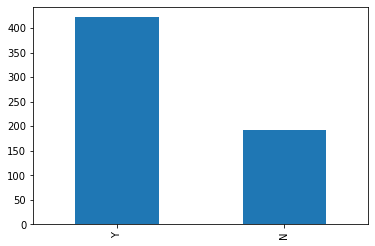

In [10]:
train['Loan_Status'].value_counts().plot.bar()

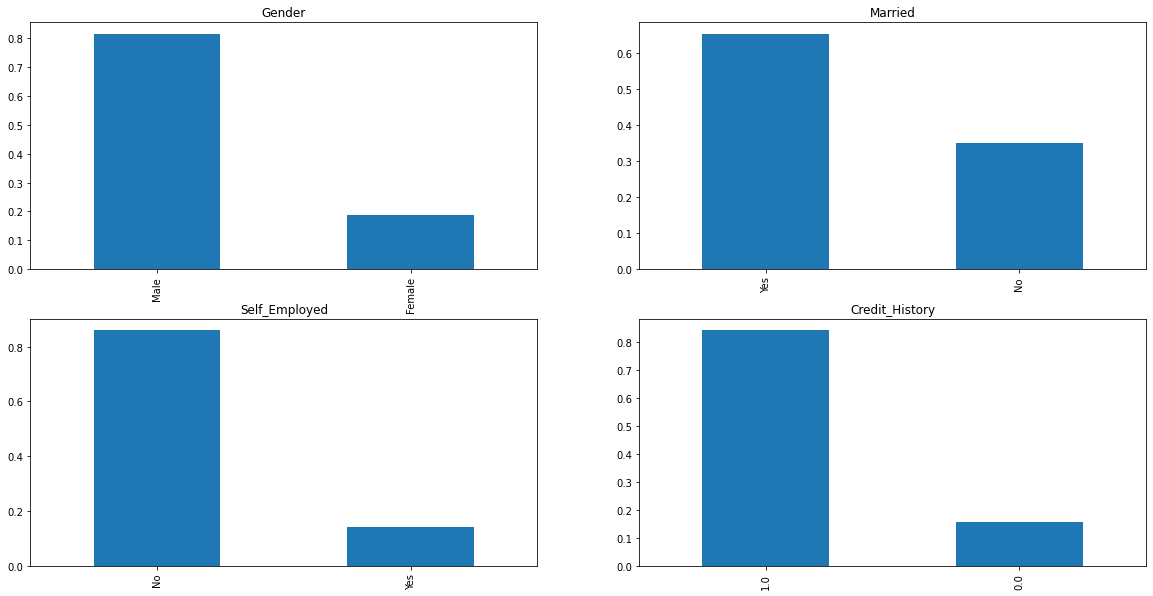

In [11]:
plt.figure(1)
plt.subplot(221)
train["Gender"].value_counts(normalize=True).plot.bar(figsize=(20,10), title="Gender")
plt.subplot(222)
train["Married"].value_counts(normalize=True).plot.bar(figsize=(20,10), title="Married")
plt.subplot(223)
train["Self_Employed"].value_counts(normalize=True).plot.bar(figsize=(20,10), title="Self_Employed")
plt.subplot(224)
train["Credit_History"].value_counts(normalize=True).plot.bar(figsize=(20,10), title="Credit_History")
plt.show()

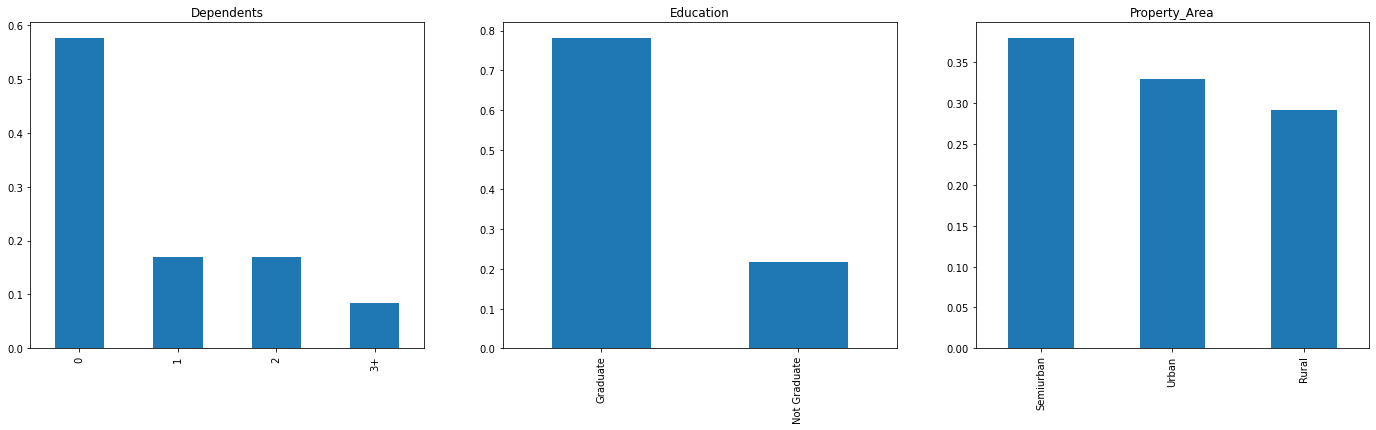

In [12]:
plt.figure(1)
plt.subplot(131)
train["Dependents"].value_counts(normalize=True).plot.bar(figsize=(24,6), title="Dependents")
plt.subplot(132)
train["Education"].value_counts(normalize=True).plot.bar(figsize=(24,6), title="Education")
plt.subplot(133)
train["Property_Area"].value_counts(normalize=True).plot.bar(figsize=(24,6), title="Property_Area")
plt.show()

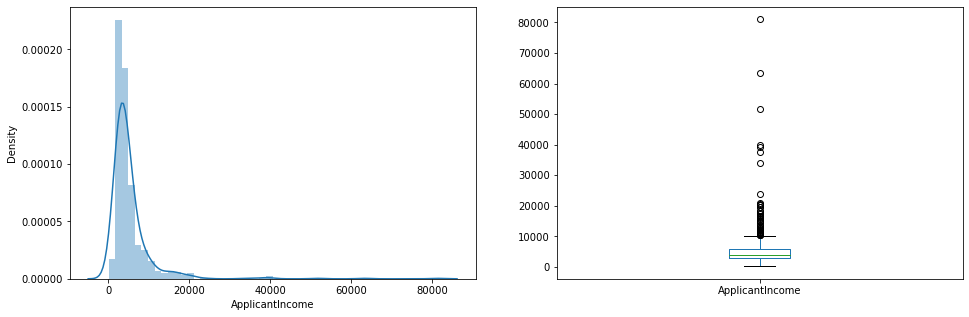

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["ApplicantIncome"])
plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

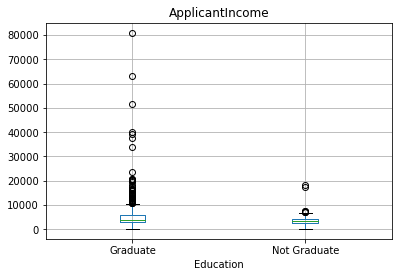

In [14]:
train.boxplot(column="ApplicantIncome",by='Education')
plt.suptitle("")


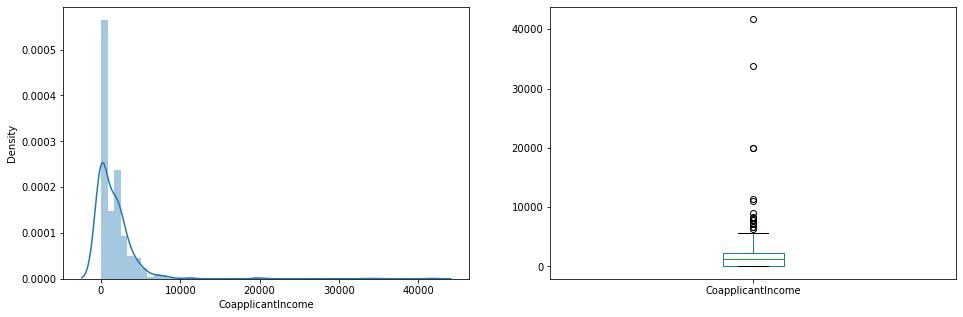

In [15]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

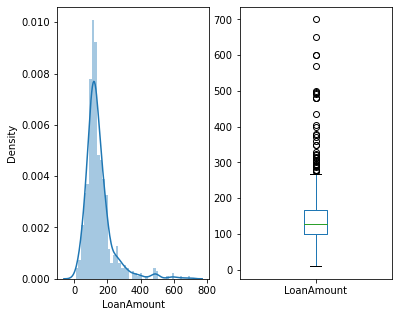

In [16]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(6,5))
plt.show()

In [17]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


<AxesSubplot:xlabel='Gender'>

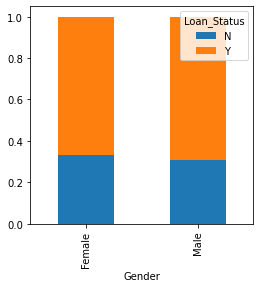

In [18]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

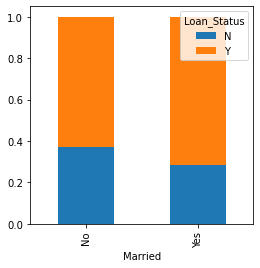

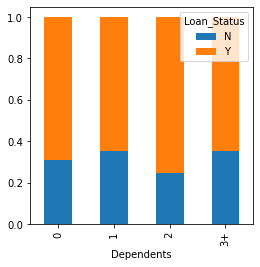

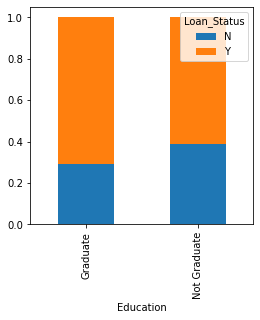

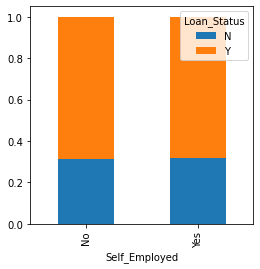

In [19]:
Married = pd.crosstab(train["Married"], train['Loan_Status'])
Dependents = pd.crosstab(train["Dependents"], train['Loan_Status'])
Education = pd.crosstab(train["Education"], train['Loan_Status'])
Self_Employed = pd.crosstab(train["Self_Employed"], train['Loan_Status'])

Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()

Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()

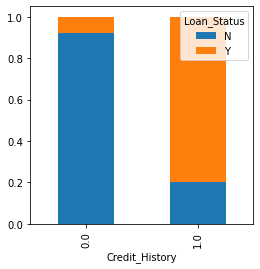

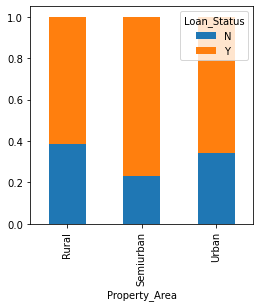

In [20]:
Credit_History = pd.crosstab(train['Credit_History'], train["Loan_Status"])
Property_Area = pd.crosstab(train['Property_Area'], train["Loan_Status"])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()

<AxesSubplot:xlabel='Loan_Status'>

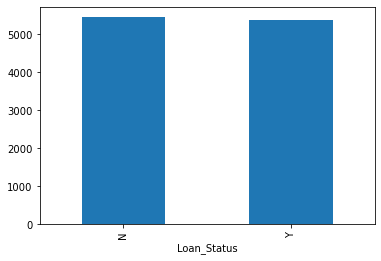

In [21]:
train.groupby("Loan_Status")["ApplicantIncome"].mean().plot.bar()

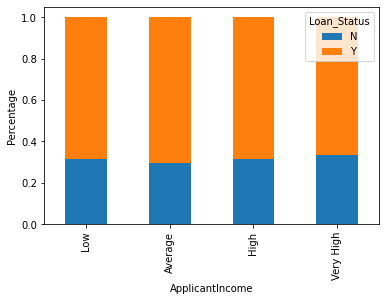

In [22]:
bins = [0,2500,4000,6000,81000]
group = ['Low',"Average","High","Very High"]
train["Income_bin"] = pd.cut(train["ApplicantIncome"],bins,labels=group)

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("ApplicantIncome")
P = plt.ylabel("Percentage")


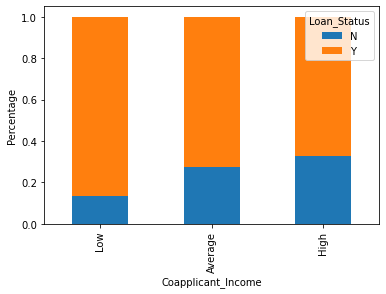

In [23]:
bins = [0,1000,3000,42000]
group = ['Low',"Average","High"]
train["Coapplicant_Income_bin"] = pd.cut(train["CoapplicantIncome"],bins,labels=group)

Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Coapplicant_Income")
P = plt.ylabel("Percentage")


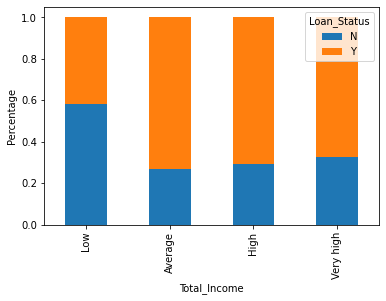

In [24]:
bins = [0,2500,4000,6000,81000]
train['Total_Income'] = train["ApplicantIncome"]+train["CoapplicantIncome"]

group = ['Low',"Average","High","Very high"]
train["Total_Income_bin"] = pd.cut(train["Total_Income"],bins,labels=group)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Total_Income")
P = plt.ylabel("Percentage")


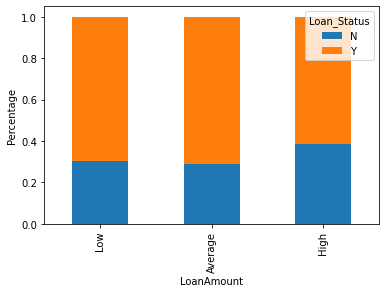

In [25]:
bins = [0,100,200,700]
group = ['Low',"Average","High"]
train["LoanAmount_bin"] = pd.cut(train["LoanAmount"],bins,labels=group)

LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel("LoanAmount")
P = plt.ylabel("Percentage")


In [26]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'Coapplicant_Income_bin', 'Total_Income',
       'Total_Income_bin', 'LoanAmount_bin'],
      dtype='object')

In [27]:
train.drop(["Income_bin","Coapplicant_Income_bin","LoanAmount_bin","Total_Income_bin","Total_Income"],axis=1, inplace=True)

In [28]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
train["Dependents"].replace("3+",3, inplace=True)
train["Loan_Status"].replace("N",0,inplace=True)
train["Loan_Status"].replace("Y",1,inplace=True)

In [30]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


<AxesSubplot:>

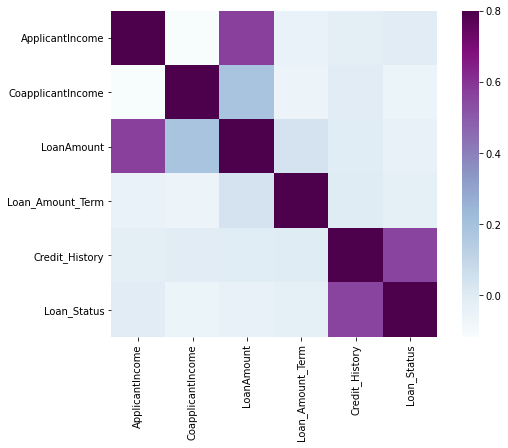

In [31]:
matrix = train.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8,square= True,cmap="BuPu")

In [32]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

In [34]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [37]:
train['Loan_Amount_Term'].fillna(train["Loan_Amount_Term"].mode()[0], inplace=True)

In [38]:
train["LoanAmount"].fillna(train['LoanAmount'].median(), inplace=True)

In [39]:
test["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
test["Married"].fillna(train["Married"].mode()[0],inplace=True)
test["Dependents"].fillna(train["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
test["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(train["Loan_Amount_Term"].mode()[0], inplace=True)
test["LoanAmount"].fillna(train['LoanAmount'].median(), inplace=True)

In [40]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

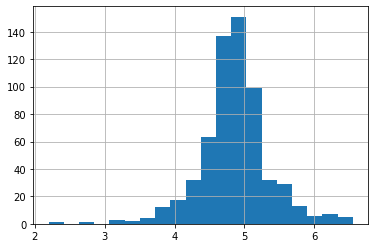

In [41]:
train["LoanAmount_Log"] = np.log(train["LoanAmount"])
train["LoanAmount_Log"].hist(bins=20)
test["LoanAmount_log"]= np.log(test["LoanAmount"])

In [42]:
train = train.drop("Loan_ID",axis=1)
test = test.drop("Loan_ID", axis=1)

In [43]:
X = train.drop("Loan_Status",1)
y=train.Loan_Status

In [44]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,4.262680
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,3.688879
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,5.533389
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,5.231109


In [45]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [46]:
X = pd.get_dummies(X)
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_Log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,4.262680,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,3.688879,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,5.533389,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,5.231109,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1


In [47]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,4.262680
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,3.688879
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,5.533389
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,5.231109


In [48]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [49]:
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_Log,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,4.262680,1,0,1,...,1,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,1,3.688879,0,1,0,...,0,0,0,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,1,5.533389,0,1,0,...,0,1,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,5.231109,0,1,0,...,0,0,1,1,0,1,0,0,0,1


In [50]:
X_train, x_cv, Y_train,y_cv = train_test_split(X,y,test_size=0.3)

In [54]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [55]:
predict_cv = model.predict(x_cv)

In [56]:
accuracy_score(y_cv,predict_cv)

0.7513513513513513

In [60]:
pred_test=model.predict(test)

In [58]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.700480,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4.836282,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,5.337538,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4.605170,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,4.356709,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1


In [61]:
submission = pd.read_csv("datasets/LoanPrediction/sample_submission_49d68Cx.csv")

In [62]:
submission["Loan_Status"] = pred_test
submission["Loan_ID"] = test_original["Loan_ID"]

In [63]:
submission["Loan_Status"].replace(0,"N",inplace=True)
submission["Loan_Status"].replace(1,"Y",inplace=True)

In [64]:
pd.DataFrame(submission,columns=["Loan_ID","Loan_Status"]).to_csv("datasets/LoanPrediction/logistic.csv")